# * Исследуйте и покажите на графике как отличаются продажи в будние и выходные
# в категориях 'Сокосодержащие напитки, смузи' и "Печенье"?
# удобрый вывод в консоле в Pytharm

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

categories = pd.read_pickle('data/categories.pkl')
orders = pd.read_pickle('data/orders.pkl')
category = categories[['Category', 'ItemID']]

        ItemID  price  quantity       Date Category Day_of_Week  Weekend
41      875721  63.38         1 2021-01-01  Печенье     Пятница    False
156     513299  77.90         1 2021-01-01  Печенье     Пятница    False
161     308902  73.90         1 2021-01-01  Печенье     Пятница    False
165     309860  77.90         1 2021-01-01  Печенье     Пятница    False
177     304614  83.90         2 2021-01-01  Печенье     Пятница    False
...        ...    ...       ...        ...      ...         ...      ...
852608  310439  29.90         3 2021-06-30  Печенье       Среда    False
852684  312021  49.90         1 2021-06-30  Печенье       Среда    False
852740  312021  49.90         2 2021-06-30  Печенье       Среда    False
852744  304614  75.51         1 2021-06-30  Печенье       Среда    False
852803  309128  34.90         1 2021-06-30  Печенье       Среда    False

[13653 rows x 7 columns]


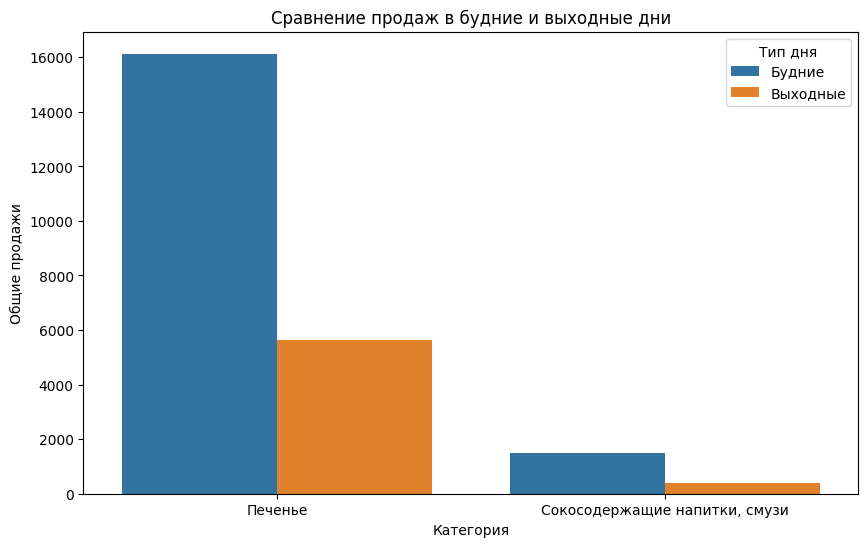

        ItemID  price  quantity       Date Category Day_of_Week  Weekend
41      875721  63.38         1 2021-01-01  Печенье     Пятница    False
156     513299  77.90         1 2021-01-01  Печенье     Пятница    False
161     308902  73.90         1 2021-01-01  Печенье     Пятница    False
165     309860  77.90         1 2021-01-01  Печенье     Пятница    False
177     304614  83.90         2 2021-01-01  Печенье     Пятница    False
...        ...    ...       ...        ...      ...         ...      ...
852608  310439  29.90         3 2021-06-30  Печенье       Среда    False
852684  312021  49.90         1 2021-06-30  Печенье       Среда    False
852740  312021  49.90         2 2021-06-30  Печенье       Среда    False
852744  304614  75.51         1 2021-06-30  Печенье       Среда    False
852803  309128  34.90         1 2021-06-30  Печенье       Среда    False

[13653 rows x 7 columns]


In [10]:
# распаковывает  orders item по датам(удобнее чем через цикл for)
df_exploded = orders.explode('items')
# print(df_exploded)

new_df = pd.json_normalize(df_exploded['items'])
new_df['Date'] = df_exploded['Date'].values

final_df = pd.merge(new_df, category, on='ItemID')
# print(final_df)


# Преобразование столбца Date в формат datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Замена названий дней недели на русские
days_translation = {
    'Monday': 'Понедельник',
    'Tuesday': 'Вторник',
    'Wednesday': 'Среда',
    'Thursday': 'Четверг',
    'Friday': 'Пятница',
    'Saturday': 'Суббота',
    'Sunday': 'Воскресенье'
}




# Добавление столбца с информацией о дне недели
final_df['Day_of_Week'] = final_df['Date'].dt.day_name()


final_df['Day_of_Week'] = final_df['Day_of_Week'].map(days_translation)

final_df = final_df[(final_df['Category'] == 'Печенье') | (final_df['Category'] == 'Сокосодержащие напитки, смузи')]

# final_df.to_excel('final_df1.xlsx', index=False)

final_df['Weekend'] = final_df['Day_of_Week'].isin(['Суббота', 'Воскресенье'])
print(final_df)

result = final_df.groupby(['Category', 'Weekend'], as_index=False)['quantity'].sum()
result['Weekend'] = result['Weekend'].map({True: 'Выходные', False: 'Будние'})

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=result, x='Category', y='quantity', hue='Weekend')
plt.title('Сравнение продаж в будние и выходные дни')
plt.xlabel('Категория')
plt.ylabel('Общие продажи')
plt.legend(title='Тип дня')
plt.show()


print(final_df)